<a href="https://colab.research.google.com/github/TVHM/summer_microcredentials_BUS/blob/main/mcphearson__of_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')


In [3]:
df.date[:2]

0    2020-01-21
1    2020-01-22
Name: date, dtype: object

The data set contains 5 features about COVID 19 pandemic in the United States.


In [31]:
# print(df)

In [5]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [6]:
df.shape

(48446, 5)

In [7]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

The first and last 5 rows of the data set reflect the number of cases and deaths reported from Jan 1, 2020 to the current date in 2022.

In [8]:
ny_df = df[df['state']=='New York']

In [9]:
print(ny_df)

             date     state  fips    cases  deaths
246    2020-03-01  New York    36        1       0
261    2020-03-02  New York    36        1       0
276    2020-03-03  New York    36        2       0
293    2020-03-04  New York    36       11       0
313    2020-03-05  New York    36       22       0
...           ...       ...   ...      ...     ...
48200  2022-07-21  New York    36  5744579   69369
48256  2022-07-22  New York    36  5752964   69408
48312  2022-07-23  New York    36  5756123   69408
48368  2022-07-24  New York    36  5758805   69408
48424  2022-07-25  New York    36  5773608   69435

[877 rows x 5 columns]


In [10]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [11]:
ny_df.shape

(877, 5)

In [12]:
ny_df.tail()

,date,state,fips,cases,deaths
48200,2022-07-21,New York,36,5744579,69369
48256,2022-07-22,New York,36,5752964,69408
48312,2022-07-23,New York,36,5756123,69408
48368,2022-07-24,New York,36,5758805,69408
48424,2022-07-25,New York,36,5773608,69435


In [13]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


An analysis of the 5 days inthe period Mar 1 to Mar 5 of  the 30 day period, there were zero deaths,cases began to rise, doubling from Mar 4 to Mar 5 2020.

In [14]:
#last death in NY
last_ny_death = ny_df[ny_df['deaths']!=876]
last_ny_death.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [15]:
#total number of cases
ny_df['cases'].max()

5773608

In [16]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

1950102416

Finding new covid 19 cases on daily basis (new cases added everyday)

In [17]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [18]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [20]:
ny_df['new_cases'].sum()

5773608

In [21]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [22]:
type(ny_new_cases)

pandas.core.series.Series

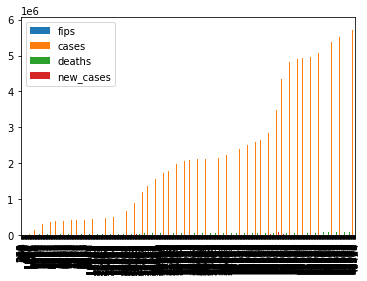

In [23]:
ny_df.plot(kind='bar')

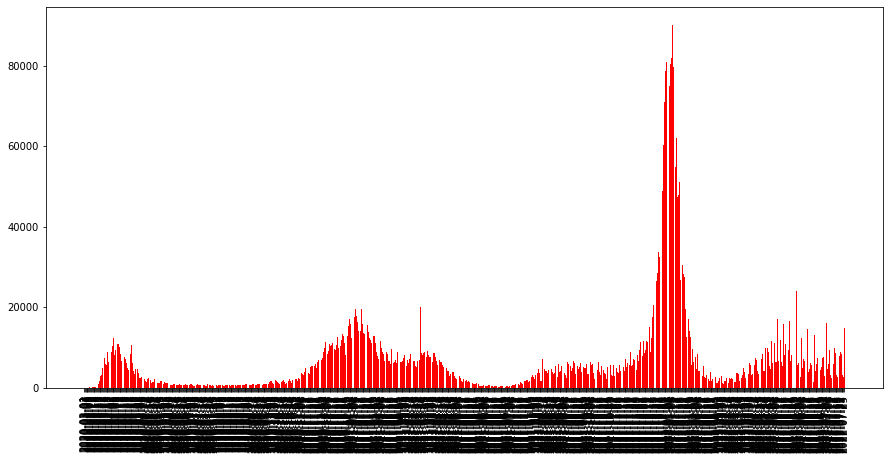

In [24]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [25]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [26]:
# ny_dates_30

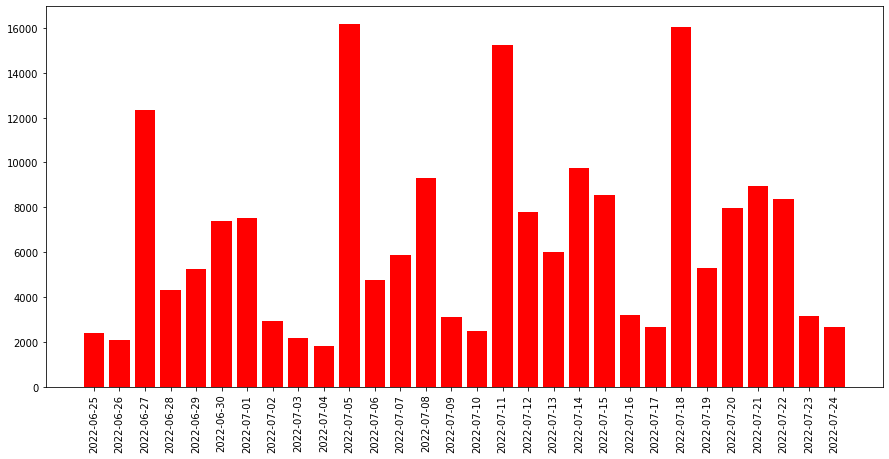

In [27]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

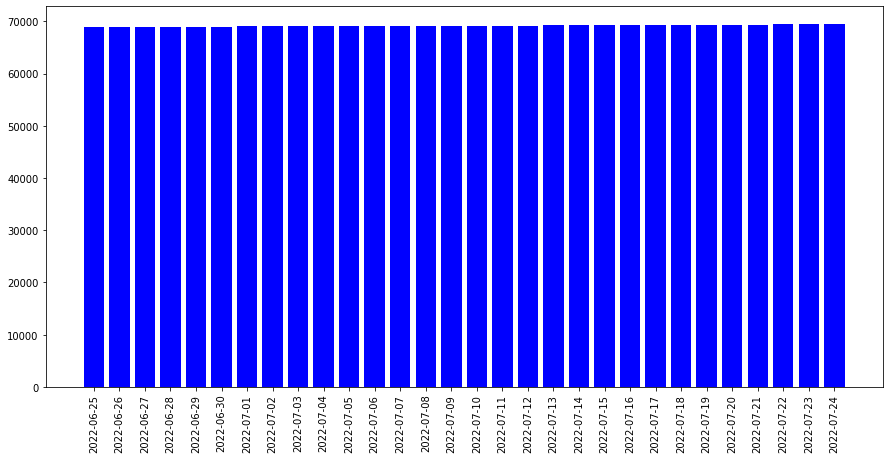

In [28]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [29]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

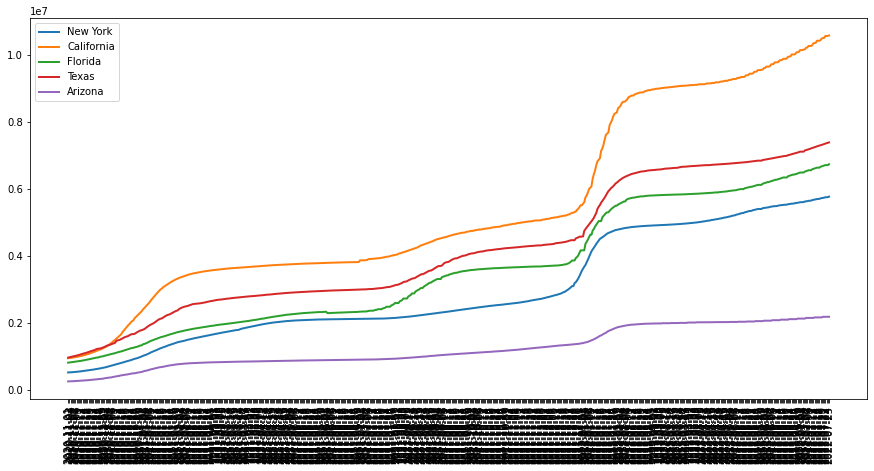

In [30]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusion:

**Conclusion 1 **

There is a visble pattern in NY COVID 19 cases in the last 30 days - an 
 observable peak in cases occuring every 5 to 7 days.

Is is not certain how to make the  data take into accoount compounding effect if the spread of the virus. By calculating a geometric mean  average of number of cases, we may gain more insight into the relationship between variable in the data set.


[further reading](https://seandavi.github.io/sars2pack/reference/nytimes_county_data.html) 

2.   Conclusion 2


     --Your text here>

